In [1]:
import os.path
from dataset_analysis import *
import random

# Utils

In [2]:
def path_generator(dataset_root_dir, dataset_split_list):
    """
    A generator that yields the path of the annotation file, the path of the RGB folder and the path of the thermal folder.
    :param dataset_root_dir:
    :param dataset_split_list: e.g. [0,1,2,3,...]
    :return:
    """
    rgb_top_dir = os.path.join(dataset_root_dir, 'sequences', 'RGB')
    thermal_top_dir = os.path.join(dataset_root_dir, 'sequences', 'Thermal')
    annot_top_dir = os.path.join(dataset_root_dir, 'annotations')

    dataset_split_list_iter = tqdm(dataset_split_list, leave=False)
    dataset_split_list_iter.set_description('progress: ')
    for idx in dataset_split_list_iter:
        idx = int(idx)
        annot_path = os.path.join(annot_top_dir, f'{idx}.xml')
        rgb_dir = os.path.join(rgb_top_dir, f'{idx}')
        thermal_dir = os.path.join(thermal_top_dir, f'{idx}')

        yield idx, annot_path, rgb_dir, thermal_dir

In [3]:
def annot_dict_generator(dataset_root_dir, dataset_split_list):
    for idx, annot_path, _, _ in path_generator(dataset_root_dir, dataset_split_list):
        _xml_dict = parse_single_annotation_file(annot_path)
        yield idx, _xml_dict, annot_path

In [4]:
def get_dataset_split_list(split_path):
    with open(split_path,'r') as f:
        split_list = f.readlines()
        # convert to int
        split_list = [int(x.strip()) for x in split_list]
    return split_list

# Overall Statistics

In [5]:
dataset_root_dir = './DATASET_ROOT'

total_video_sequences = count_sequences(dataset_root_dir)
total_frames = 0

total_category_distribution_frame_level_dict = {}

total_sequence_length_distribution = {}

total_outside_distribution_frame_level_dict = {}
total_occlusion_distribution_frame_level_dict = {}
total_altitude_distribution_frame_level_dict = {}
total_illumination_distribution_frame_level_dict = {}
# total_keep_out_distribution_frame_level_dict = {}
# total_cam_movement_distribution_frame_level_dict = {}
total_scene_distribution_frame_level_dict = {}

In [6]:
dataset_split_list = get_dataset_split_list(os.path.join(dataset_root_dir,'all.txt'))
for idx, xml_dict, xml_path in annot_dict_generator(dataset_root_dir, dataset_split_list):
    # if count >= 30:
    #     break # for debug only
    try:
        # frames number update---------------------------------------------------------------------------------
        frames = count_frames_per_sequence(xml_dict)
        total_frames += frames
        total_sequence_length_distribution[f'{idx}'] = frames
        # frame-level category distribution--------------------------------------------------------------------
        category_count_frame_level_dict = count_category_occurrences_frame_level_per_sequence(xml_dict)
        total_category_distribution_frame_level_dict = merge_dicts(
            total_category_distribution_frame_level_dict,
            category_count_frame_level_dict
        )
        # frame-level attribute distribution--------------------------------------------------------------------
        outside_distribution_frame_level_dict, occlusion_distribution_frame_level_dict, altitude_distribution_frame_level_dict, illumination_distribution_frame_level_dict, scene_distribution_frame_level_dict = count_attribute_occurrence_frame_level_per_sequence(
            xml_dict)
    except Exception as e:
        print("\033[1;31merror\033[0m")  # print bold "error" in red
        traceback.print_exc()
        print(f"xml file:{xml_path}")

    total_outside_distribution_frame_level_dict = merge_dicts(total_outside_distribution_frame_level_dict,
                                                              outside_distribution_frame_level_dict)
    total_occlusion_distribution_frame_level_dict = merge_dicts(total_occlusion_distribution_frame_level_dict,
                                                                occlusion_distribution_frame_level_dict)
    total_altitude_distribution_frame_level_dict = merge_dicts(total_altitude_distribution_frame_level_dict,
                                                               altitude_distribution_frame_level_dict)
    total_illumination_distribution_frame_level_dict = merge_dicts(total_illumination_distribution_frame_level_dict,
                                                                   illumination_distribution_frame_level_dict)
    total_scene_distribution_frame_level_dict = merge_dicts(total_scene_distribution_frame_level_dict,
                                                            scene_distribution_frame_level_dict)

In [7]:
total_video_sequences

120

In [8]:
total_frames

75826

In [9]:
total_sequence_length_distribution

{'0': 540,
 '1': 538,
 '2': 541,
 '3': 542,
 '4': 621,
 '5': 585,
 '6': 551,
 '7': 533,
 '8': 530,
 '9': 536,
 '10': 553,
 '11': 555,
 '12': 550,
 '13': 551,
 '14': 534,
 '15': 543,
 '16': 543,
 '17': 536,
 '18': 536,
 '19': 618,
 '20': 543,
 '21': 595,
 '22': 542,
 '23': 570,
 '24': 581,
 '25': 593,
 '26': 503,
 '27': 511,
 '28': 470,
 '29': 510,
 '30': 549,
 '31': 959,
 '32': 769,
 '33': 983,
 '34': 942,
 '35': 584,
 '36': 282,
 '37': 615,
 '38': 577,
 '39': 561,
 '40': 942,
 '41': 970,
 '42': 932,
 '43': 579,
 '44': 948,
 '45': 675,
 '46': 503,
 '47': 662,
 '48': 604,
 '49': 761,
 '50': 947,
 '51': 543,
 '52': 549,
 '53': 609,
 '54': 599,
 '55': 688,
 '56': 579,
 '57': 673,
 '58': 567,
 '59': 556,
 '60': 561,
 '61': 555,
 '62': 925,
 '63': 671,
 '64': 919,
 '65': 928,
 '66': 595,
 '67': 983,
 '68': 992,
 '69': 585,
 '70': 534,
 '71': 574,
 '72': 568,
 '73': 532,
 '74': 539,
 '75': 584,
 '76': 564,
 '77': 629,
 '78': 995,
 '79': 552,
 '80': 512,
 '81': 638,
 '82': 559,
 '83': 570,
 '

In [10]:
total_category_distribution_frame_level_dict

{'person': 2673067, 'cycle': 292074, 'car': 3190305}

In [11]:
total_altitude_distribution_frame_level_dict

{'30m': 20707, '60m': 21620, '90m': 17045, '120m': 16454}

In [12]:
total_illumination_distribution_frame_level_dict

{'bright_light': 74738, 'weak_light': 1088}

In [13]:
total_occlusion_distribution_frame_level_dict

{'0': 6048291, '1': 107155}

In [14]:
total_outside_distribution_frame_level_dict

{'0': 1282725, '1': 4872721}

In [15]:
total_scene_distribution_frame_level_dict

{'street': 64084, 'stadium': 11742}

In [16]:
count_error_files(dataset_root_dir)

0

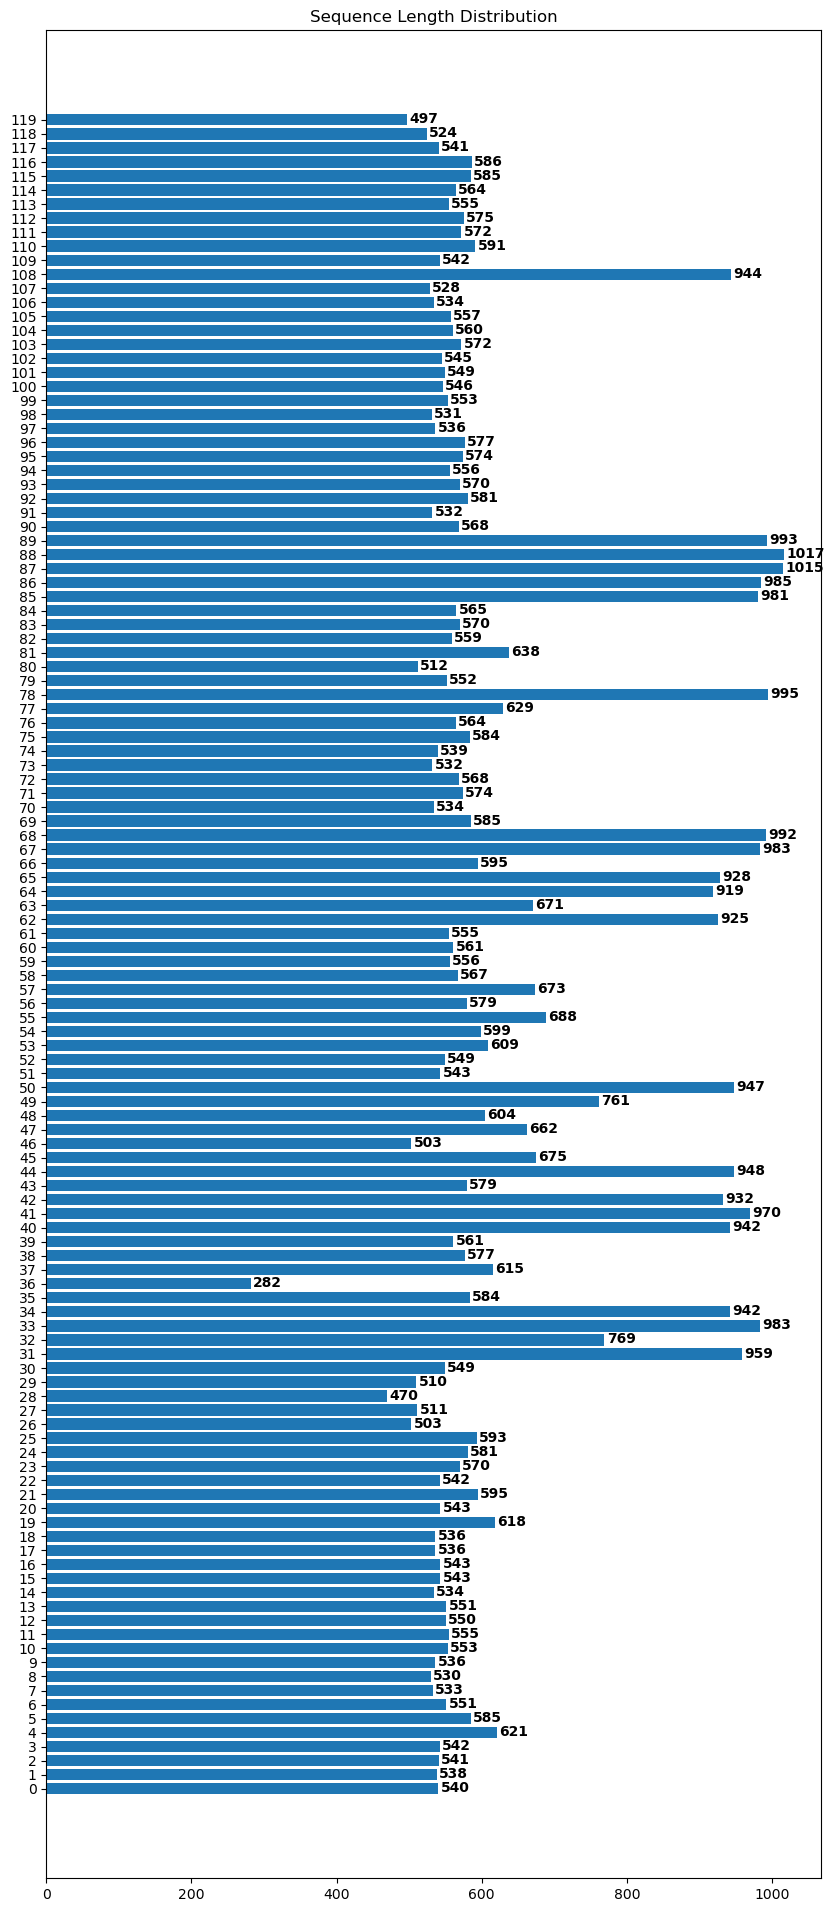

In [17]:
draw_bar_chart(total_sequence_length_distribution, title="Sequence Length Distribution")

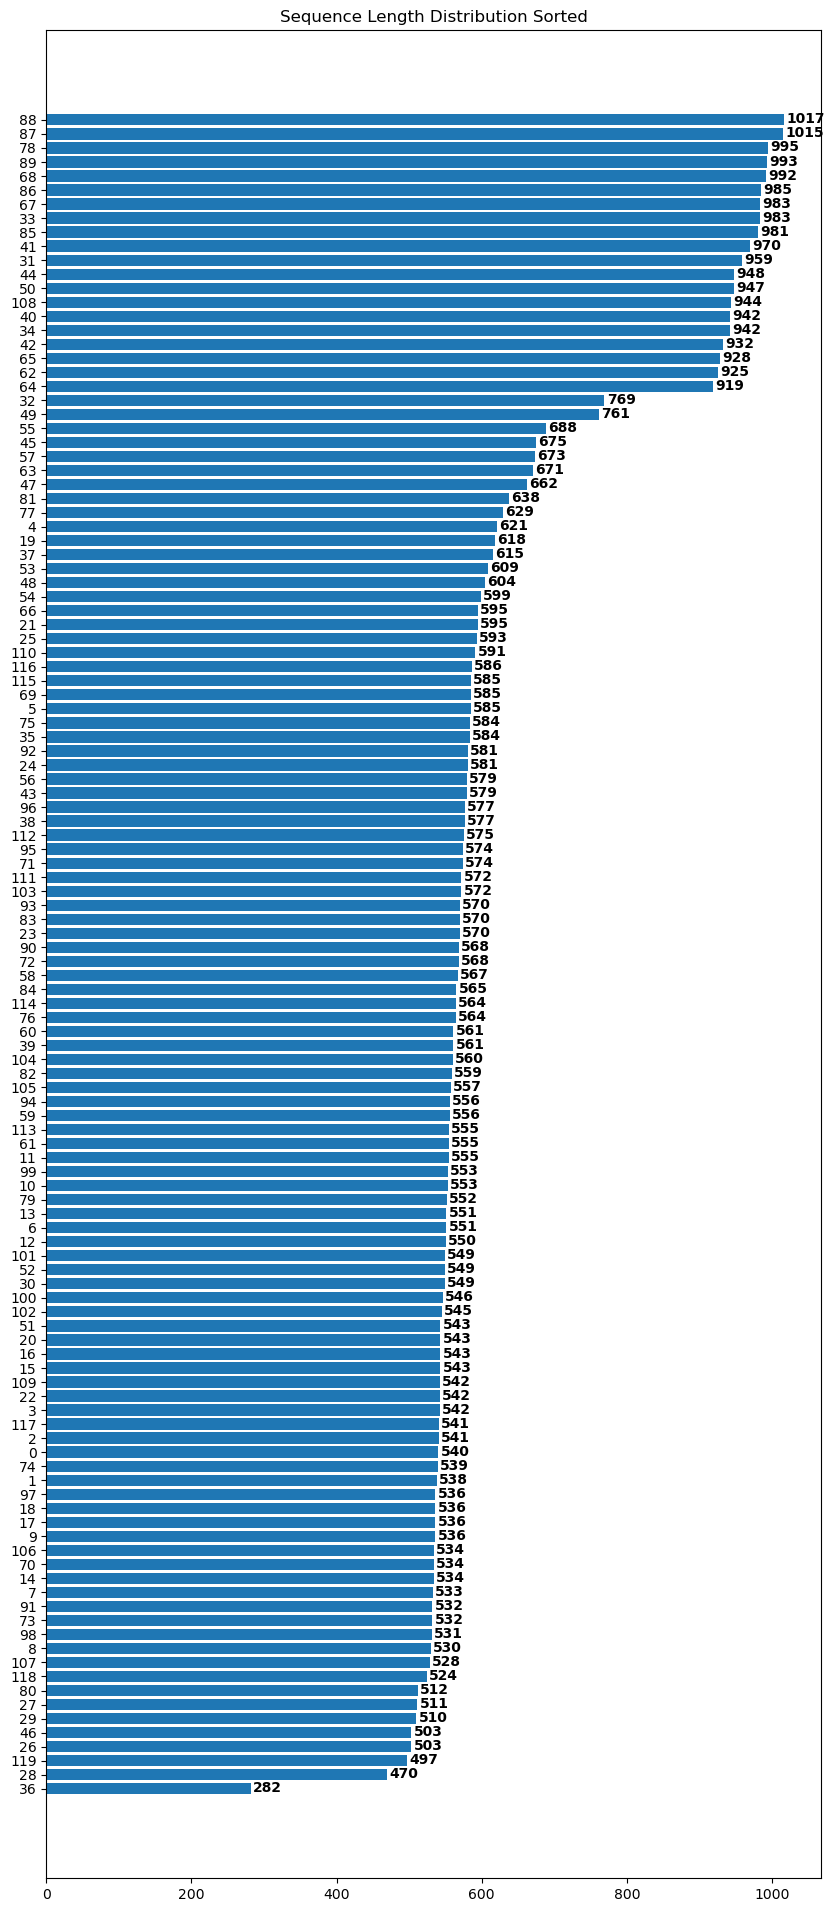

In [18]:
draw_bar_chart(dict(sorted(total_sequence_length_distribution.items(),key=lambda x:x[1])), title="Sequence Length Distribution Sorted")

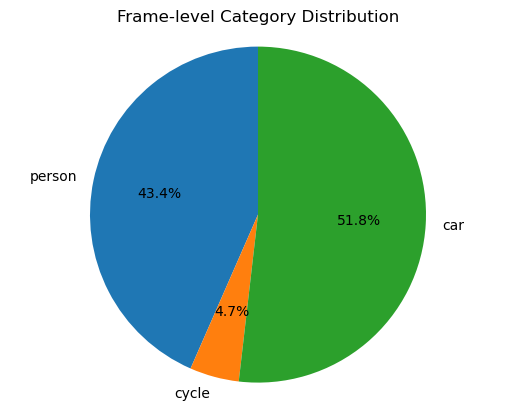

In [19]:
draw_pie_chart(total_category_distribution_frame_level_dict, title="Frame-level Category Distribution")

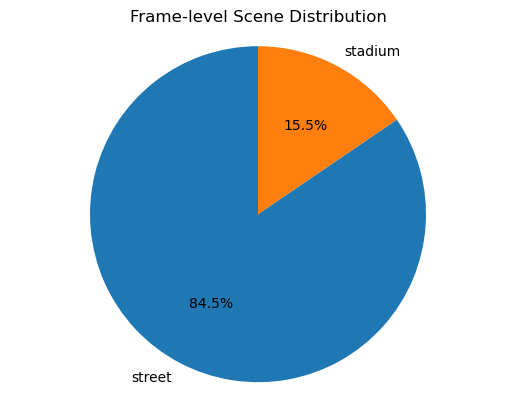

In [20]:
draw_pie_chart(total_scene_distribution_frame_level_dict, title="Frame-level Scene Distribution")

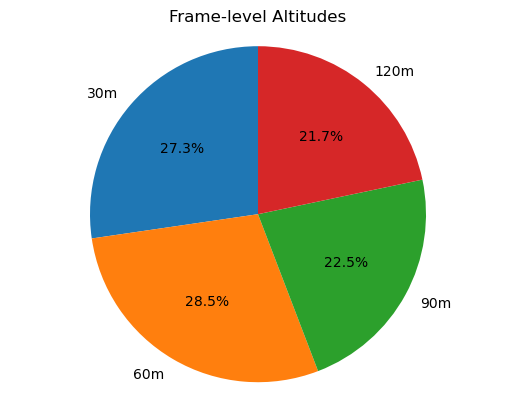

In [21]:
draw_pie_chart(total_altitude_distribution_frame_level_dict, title="Frame-level Altitudes")

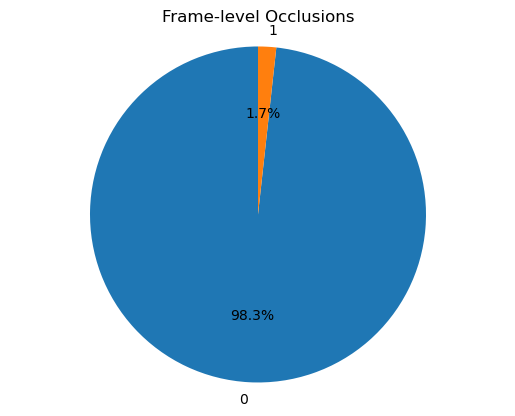

In [22]:
draw_pie_chart(total_occlusion_distribution_frame_level_dict, title="Frame-level Occlusions")

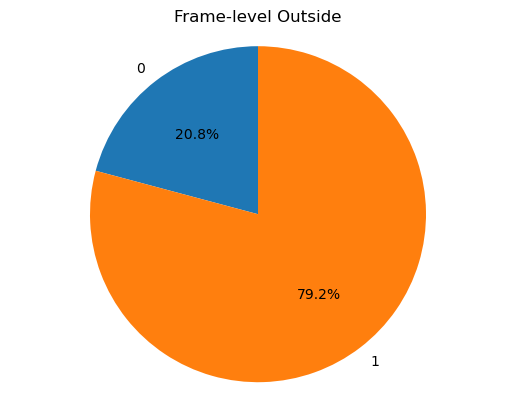

In [23]:
draw_pie_chart(total_outside_distribution_frame_level_dict, title="Frame-level Outside")

# Dataset Split

In [24]:
# get_dataset_split_list('D:\\Project_repository\\RGBT_multi_dataset\\DATASET_ROOT\\test.txt')

In [25]:
# with open('D:\\Project_repository\\RGBT_multi_dataset\\DATASET_ROOT\\all.txt','w') as f:
#     for i in range(120):
#         f.write(str(i)+'\n')

## Split

In [26]:
random.seed(1)

def random_dic(dicts):
    dict_key_ls = list(dicts.keys())
    random.shuffle(dict_key_ls)
    new_dic = {}
    for key in dict_key_ls:
        new_dic[key] = dicts.get(key)
    return new_dic

# shuffled_thermal_len_dict = dict(sorted(total_sequence_length_distribution.items(),key=lambda x:x[1]))
shuffled_thermal_len_dict = random_dic(total_sequence_length_distribution)  # shuffled, don't use sorted
# count total
total = 0
for key, val in shuffled_thermal_len_dict.items():
    total += val

# proportion， 12:6:1
train_num = int(total * 0.632 + 0.5)
val_num = int(total * 0.316 + 0.5)
test_num = total - train_num - val_num

train_list = []
val_list = []
test_list = []
for key, val in shuffled_thermal_len_dict.items():
    if train_num > 0 and train_num - val >= 0:  # if training set is not full
        train_list.append(f'{key}\n')
        train_num -= val
    elif val_num > 0 and val_num - val >= 0:  # val
        val_list.append(f'{key}\n')
        val_num -= val
    else:  # test
        test_list.append(f'{key}\n')

train_txt_path = os.path.join(dataset_root_dir,'train.txt')
val_txt_path = os.path.join(dataset_root_dir,'val.txt')
test_txt_path = os.path.join(dataset_root_dir,'test.txt')

with open(train_txt_path, 'w') as f:
    f.writelines(train_list)
with open(val_txt_path, 'w') as f:
    f.writelines(val_list)
with open(test_txt_path, 'w') as f:
    f.writelines(test_list)

## Statistics

### Train

In [27]:
train_video_sequences = 0
train_frames = 0

train_category_distribution_frame_level_dict = {}

train_sequence_length_distribution = {}

train_outside_distribution_frame_level_dict = {}
train_occlusion_distribution_frame_level_dict = {}
train_altitude_distribution_frame_level_dict = {}
train_illumination_distribution_frame_level_dict = {}
train_scene_distribution_frame_level_dict = {}

In [28]:
dataset_split_list = get_dataset_split_list(os.path.join(dataset_root_dir,'train.txt'))
for idx, xml_dict, xml_path in annot_dict_generator(dataset_root_dir, dataset_split_list):
    # if count >= 30:
    #     break # for debug only
    try:
        # frames number update---------------------------------------------------------------------------------
        train_video_sequences += 1
        frames = count_frames_per_sequence(xml_dict)
        train_frames += frames
        train_sequence_length_distribution[f'{idx}'] = frames
        # frame-level category distribution--------------------------------------------------------------------
        category_count_frame_level_dict = count_category_occurrences_frame_level_per_sequence(xml_dict)
        train_category_distribution_frame_level_dict = merge_dicts(
            train_category_distribution_frame_level_dict,
            category_count_frame_level_dict
        )
        # frame-level attribute distribution--------------------------------------------------------------------
        outside_distribution_frame_level_dict, occlusion_distribution_frame_level_dict, altitude_distribution_frame_level_dict, illumination_distribution_frame_level_dict, scene_distribution_frame_level_dict = count_attribute_occurrence_frame_level_per_sequence(
            xml_dict)
    except Exception as e:
        print("\033[1;31merror\033[0m")  # print bold "error" in red
        traceback.print_exc()
        print(f"xml file:{xml_path}")

    train_outside_distribution_frame_level_dict = merge_dicts(train_outside_distribution_frame_level_dict,
                                                              outside_distribution_frame_level_dict)
    train_occlusion_distribution_frame_level_dict = merge_dicts(train_occlusion_distribution_frame_level_dict,
                                                                occlusion_distribution_frame_level_dict)
    train_altitude_distribution_frame_level_dict = merge_dicts(train_altitude_distribution_frame_level_dict,
                                                               altitude_distribution_frame_level_dict)
    train_illumination_distribution_frame_level_dict = merge_dicts(train_illumination_distribution_frame_level_dict,
                                                                   illumination_distribution_frame_level_dict)
    train_scene_distribution_frame_level_dict = merge_dicts(train_scene_distribution_frame_level_dict,
                                                            scene_distribution_frame_level_dict)

In [29]:
train_video_sequences

77

In [30]:
train_frames

47907

In [31]:
train_sequence_length_distribution

{'119': 497,
 '81': 638,
 '20': 543,
 '90': 568,
 '68': 992,
 '41': 970,
 '4': 621,
 '79': 552,
 '38': 577,
 '10': 553,
 '14': 534,
 '95': 574,
 '22': 542,
 '78': 995,
 '114': 564,
 '71': 574,
 '73': 532,
 '52': 549,
 '94': 556,
 '9': 536,
 '82': 559,
 '116': 586,
 '96': 577,
 '93': 570,
 '39': 561,
 '36': 282,
 '105': 557,
 '50': 947,
 '16': 543,
 '33': 983,
 '24': 581,
 '6': 551,
 '84': 565,
 '5': 585,
 '35': 584,
 '74': 539,
 '11': 555,
 '104': 560,
 '43': 579,
 '112': 575,
 '30': 549,
 '66': 595,
 '117': 541,
 '25': 593,
 '51': 543,
 '31': 959,
 '98': 531,
 '59': 556,
 '19': 618,
 '64': 919,
 '42': 932,
 '65': 928,
 '80': 512,
 '113': 555,
 '45': 675,
 '61': 555,
 '21': 595,
 '47': 662,
 '7': 533,
 '18': 536,
 '99': 553,
 '46': 503,
 '88': 1017,
 '23': 570,
 '103': 572,
 '53': 609,
 '86': 985,
 '37': 615,
 '58': 567,
 '76': 564,
 '118': 524,
 '44': 948,
 '91': 532,
 '70': 534,
 '111': 572,
 '56': 579,
 '28': 470}

In [32]:
train_category_distribution_frame_level_dict

{'car': 1933369, 'person': 1513524, 'cycle': 190725}

In [33]:
train_altitude_distribution_frame_level_dict

{'30m': 14729, '60m': 12555, '90m': 10564, '120m': 10059}

In [34]:
train_illumination_distribution_frame_level_dict

{'bright_light': 46819, 'weak_light': 1088}

In [35]:
train_occlusion_distribution_frame_level_dict

{'0': 3571328, '1': 66290}

In [36]:
train_outside_distribution_frame_level_dict

{'0': 765949, '1': 2871669}

In [37]:
train_scene_distribution_frame_level_dict

{'street': 40860, 'stadium': 7047}

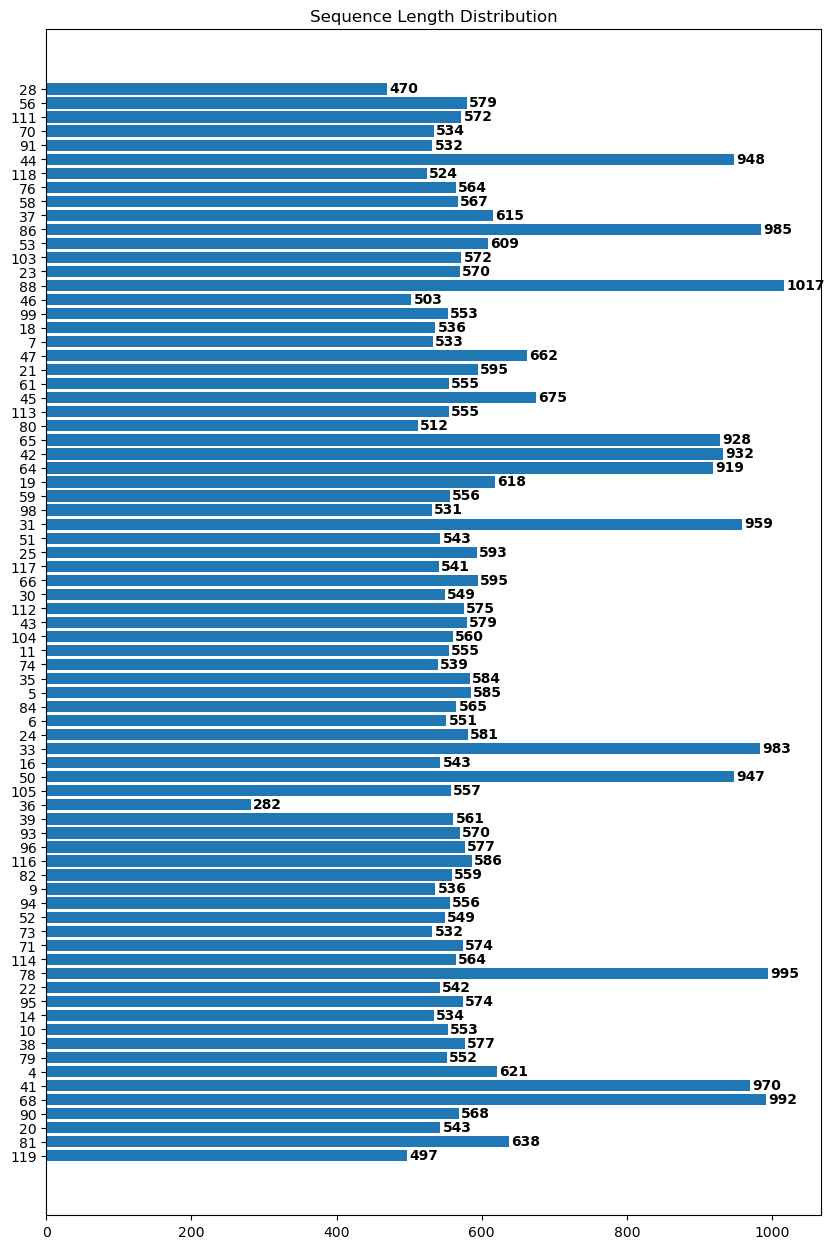

In [38]:
draw_bar_chart(train_sequence_length_distribution, title="Sequence Length Distribution")

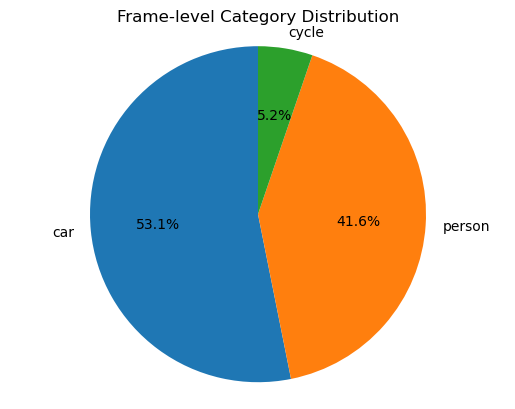

In [39]:
draw_pie_chart(train_category_distribution_frame_level_dict, title="Frame-level Category Distribution")

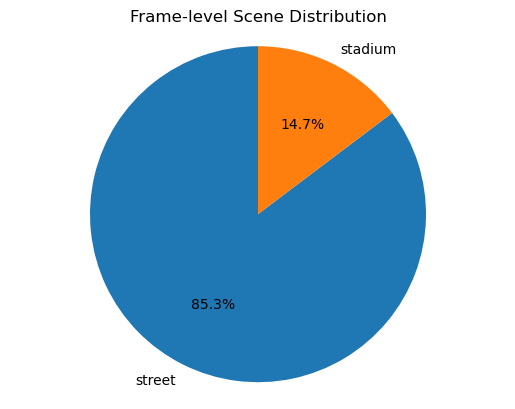

In [40]:
draw_pie_chart(train_scene_distribution_frame_level_dict, title="Frame-level Scene Distribution")

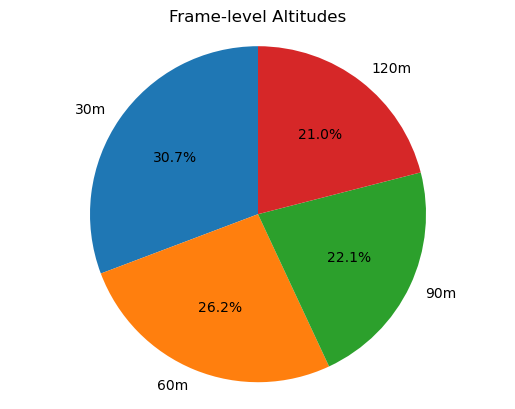

In [41]:
draw_pie_chart(train_altitude_distribution_frame_level_dict, title="Frame-level Altitudes")

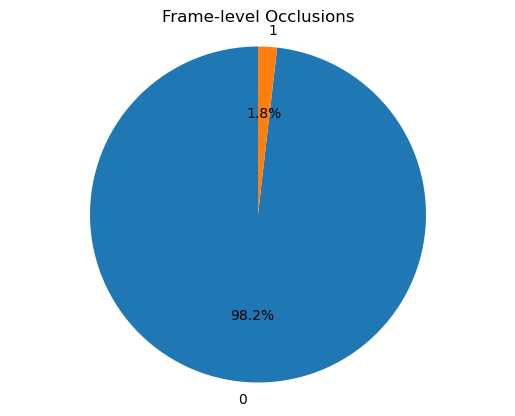

In [42]:
draw_pie_chart(train_occlusion_distribution_frame_level_dict, title="Frame-level Occlusions")

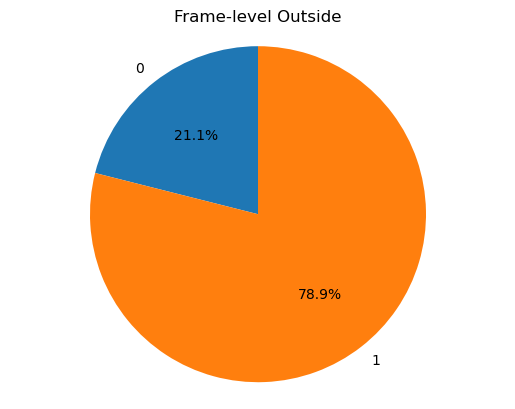

In [43]:
draw_pie_chart(train_outside_distribution_frame_level_dict, title="Frame-level Outside")

### Validation

In [44]:
val_video_sequences = 0
val_frames = 0

val_category_distribution_frame_level_dict = {}

val_sequence_length_distribution = {}

val_outside_distribution_frame_level_dict = {}
val_occlusion_distribution_frame_level_dict = {}
val_altitude_distribution_frame_level_dict = {}
val_illumination_distribution_frame_level_dict = {}
val_scene_distribution_frame_level_dict = {}

In [45]:
dataset_split_list = get_dataset_split_list(os.path.join(dataset_root_dir,'val.txt'))
for idx, xml_dict, xml_path in annot_dict_generator(dataset_root_dir, dataset_split_list):
    # if count >= 30:
    #     break # for debug only
    try:
        # frames number update---------------------------------------------------------------------------------
        val_video_sequences += 1
        frames = count_frames_per_sequence(xml_dict)
        val_frames += frames
        val_sequence_length_distribution[f'{idx}'] = frames
        # frame-level category distribution--------------------------------------------------------------------
        category_count_frame_level_dict = count_category_occurrences_frame_level_per_sequence(xml_dict)
        val_category_distribution_frame_level_dict = merge_dicts(
            val_category_distribution_frame_level_dict,
            category_count_frame_level_dict
        )
        # frame-level attribute distribution--------------------------------------------------------------------
        outside_distribution_frame_level_dict, occlusion_distribution_frame_level_dict, altitude_distribution_frame_level_dict, illumination_distribution_frame_level_dict, scene_distribution_frame_level_dict = count_attribute_occurrence_frame_level_per_sequence(
            xml_dict)
    except Exception as e:
        print("\033[1;31merror\033[0m")  # print bold "error" in red
        traceback.print_exc()
        print(f"xml file:{xml_path}")

    val_outside_distribution_frame_level_dict = merge_dicts(val_outside_distribution_frame_level_dict,
                                                              outside_distribution_frame_level_dict)
    val_occlusion_distribution_frame_level_dict = merge_dicts(val_occlusion_distribution_frame_level_dict,
                                                                occlusion_distribution_frame_level_dict)
    val_altitude_distribution_frame_level_dict = merge_dicts(val_altitude_distribution_frame_level_dict,
                                                               altitude_distribution_frame_level_dict)
    val_illumination_distribution_frame_level_dict = merge_dicts(val_illumination_distribution_frame_level_dict,
                                                                   illumination_distribution_frame_level_dict)
    val_scene_distribution_frame_level_dict = merge_dicts(val_scene_distribution_frame_level_dict,
                                                            scene_distribution_frame_level_dict)

In [46]:
val_video_sequences

36

In [47]:
val_frames

23491

In [48]:
val_sequence_length_distribution

{'67': 983,
 '85': 981,
 '54': 599,
 '27': 511,
 '106': 534,
 '1': 538,
 '69': 585,
 '107': 528,
 '87': 1015,
 '2': 541,
 '101': 549,
 '40': 942,
 '13': 551,
 '75': 584,
 '29': 510,
 '92': 581,
 '34': 942,
 '109': 542,
 '89': 993,
 '0': 540,
 '110': 591,
 '77': 629,
 '55': 688,
 '49': 761,
 '3': 542,
 '62': 925,
 '12': 550,
 '26': 503,
 '100': 546,
 '48': 604,
 '83': 570,
 '60': 561,
 '57': 673,
 '115': 585,
 '63': 671,
 '15': 543}

In [49]:
val_category_distribution_frame_level_dict

{'person': 947329, 'car': 1002634, 'cycle': 81495}

In [50]:
val_altitude_distribution_frame_level_dict

{'30m': 5209, '60m': 8497, '90m': 4456, '120m': 5329}

In [51]:
val_illumination_distribution_frame_level_dict

{'bright_light': 23491, 'weak_light': 0}

In [52]:
val_occlusion_distribution_frame_level_dict

{'0': 1992560, '1': 38898}

In [53]:
val_outside_distribution_frame_level_dict

{'0': 425917, '1': 1605541}

In [54]:
val_scene_distribution_frame_level_dict

{'street': 19740, 'stadium': 3751}

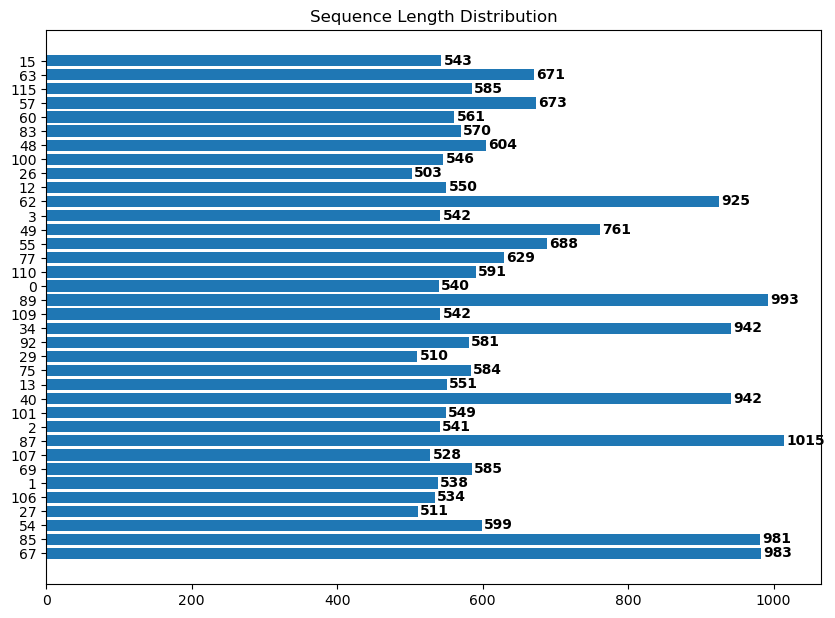

In [55]:
draw_bar_chart(val_sequence_length_distribution, title="Sequence Length Distribution")

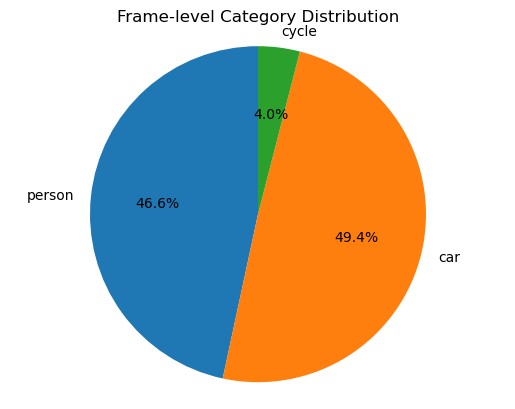

In [56]:
draw_pie_chart(val_category_distribution_frame_level_dict, title="Frame-level Category Distribution")

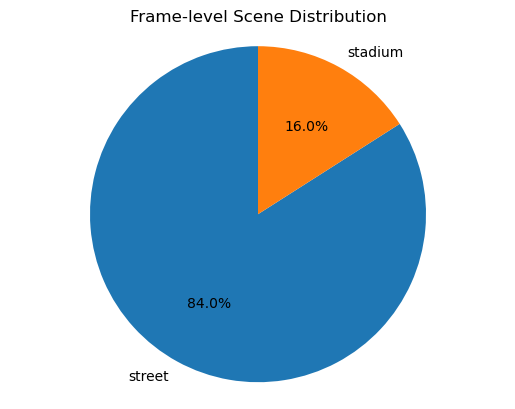

In [57]:
draw_pie_chart(val_scene_distribution_frame_level_dict, title="Frame-level Scene Distribution")

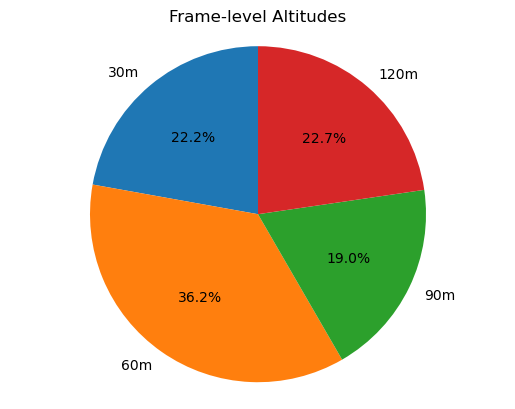

In [58]:
draw_pie_chart(val_altitude_distribution_frame_level_dict, title="Frame-level Altitudes")

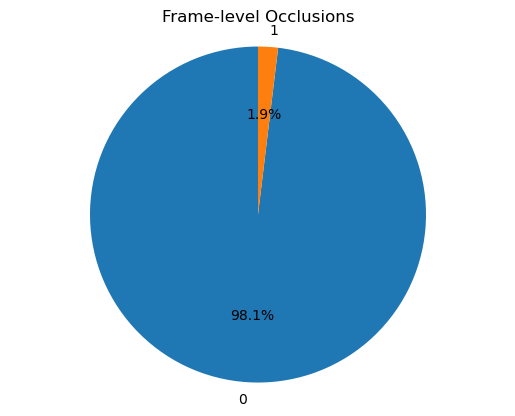

In [59]:
draw_pie_chart(val_occlusion_distribution_frame_level_dict, title="Frame-level Occlusions")

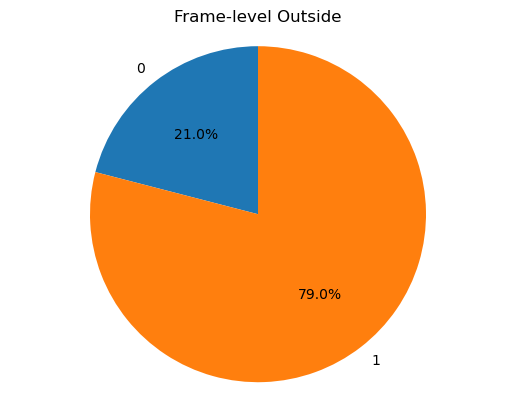

In [60]:
draw_pie_chart(val_outside_distribution_frame_level_dict, title="Frame-level Outside")

### Test

In [61]:
test_video_sequences = 0
test_frames = 0

test_category_distribution_frame_level_dict = {}

test_sequence_length_distribution = {}

test_outside_distribution_frame_level_dict = {}
test_occlusion_distribution_frame_level_dict = {}
test_altitude_distribution_frame_level_dict = {}
test_illumination_distribution_frame_level_dict = {}
test_scene_distribution_frame_level_dict = {}

In [62]:
dataset_split_list = get_dataset_split_list(os.path.join(dataset_root_dir,'test.txt'))
for idx, xml_dict, xml_path in annot_dict_generator(dataset_root_dir, dataset_split_list):
    # if count >= 30:
    #     break # for debug only
    try:
        # frames number update---------------------------------------------------------------------------------
        test_video_sequences += 1
        frames = count_frames_per_sequence(xml_dict)
        test_frames += frames
        test_sequence_length_distribution[f'{idx}'] = frames
        # frame-level category distribution--------------------------------------------------------------------
        category_count_frame_level_dict = count_category_occurrences_frame_level_per_sequence(xml_dict)
        test_category_distribution_frame_level_dict = merge_dicts(
            test_category_distribution_frame_level_dict,
            category_count_frame_level_dict
        )
        # frame-level attribute distribution--------------------------------------------------------------------
        outside_distribution_frame_level_dict, occlusion_distribution_frame_level_dict, altitude_distribution_frame_level_dict, illumination_distribution_frame_level_dict, scene_distribution_frame_level_dict = count_attribute_occurrence_frame_level_per_sequence(
            xml_dict)
    except Exception as e:
        print("\033[1;31merror\033[0m")  # print bold "error" in red
        traceback.print_exc()
        print(f"xml file:{xml_path}")

    test_outside_distribution_frame_level_dict = merge_dicts(test_outside_distribution_frame_level_dict,
                                                              outside_distribution_frame_level_dict)
    test_occlusion_distribution_frame_level_dict = merge_dicts(test_occlusion_distribution_frame_level_dict,
                                                                occlusion_distribution_frame_level_dict)
    test_altitude_distribution_frame_level_dict = merge_dicts(test_altitude_distribution_frame_level_dict,
                                                               altitude_distribution_frame_level_dict)
    test_illumination_distribution_frame_level_dict = merge_dicts(test_illumination_distribution_frame_level_dict,
                                                                   illumination_distribution_frame_level_dict)
    test_scene_distribution_frame_level_dict = merge_dicts(test_scene_distribution_frame_level_dict,
                                                            scene_distribution_frame_level_dict)

In [63]:
test_video_sequences

7

In [64]:
test_frames

4428

In [65]:
test_sequence_length_distribution

{'32': 769, '8': 530, '97': 536, '102': 545, '108': 944, '72': 568, '17': 536}

In [66]:
test_category_distribution_frame_level_dict

{'person': 212214, 'car': 254302, 'cycle': 19854}

In [67]:
test_altitude_distribution_frame_level_dict

{'30m': 769, '60m': 568, '90m': 2025, '120m': 1066}

In [68]:
test_illumination_distribution_frame_level_dict

{'bright_light': 4428, 'weak_light': 0}

In [69]:
test_occlusion_distribution_frame_level_dict

{'0': 484403, '1': 1967}

In [70]:
test_outside_distribution_frame_level_dict

{'0': 90859, '1': 395511}

In [71]:
test_scene_distribution_frame_level_dict

{'street': 3484, 'stadium': 944}

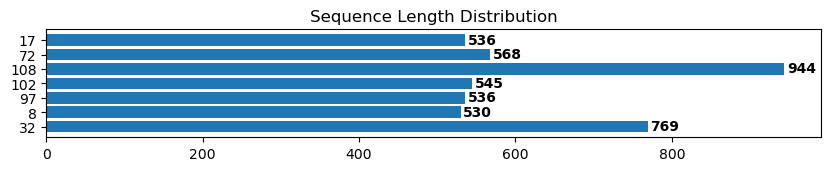

In [72]:
draw_bar_chart(test_sequence_length_distribution, title="Sequence Length Distribution")

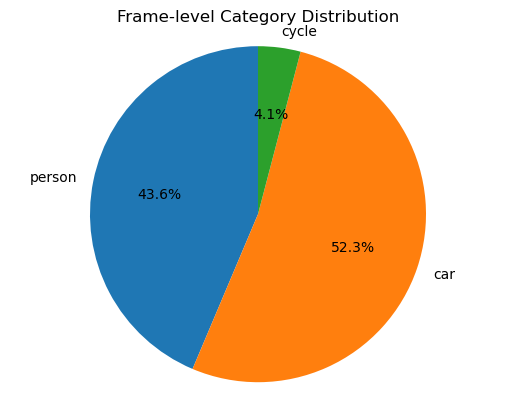

In [73]:
draw_pie_chart(test_category_distribution_frame_level_dict, title="Frame-level Category Distribution")

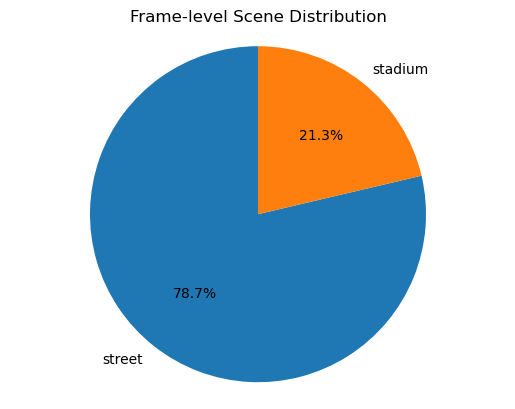

In [74]:
draw_pie_chart(test_scene_distribution_frame_level_dict, title="Frame-level Scene Distribution")

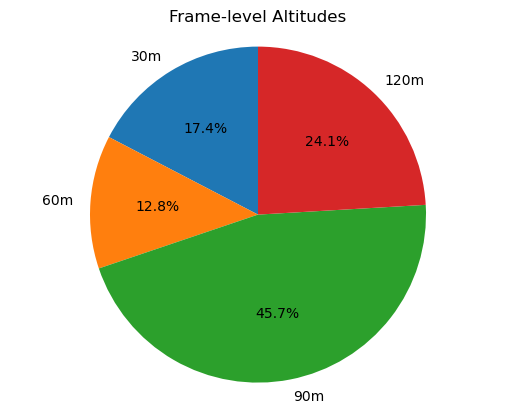

In [75]:
draw_pie_chart(test_altitude_distribution_frame_level_dict, title="Frame-level Altitudes")

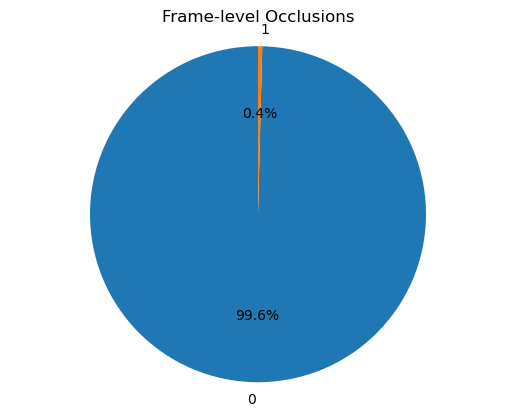

In [76]:
draw_pie_chart(test_occlusion_distribution_frame_level_dict, title="Frame-level Occlusions")

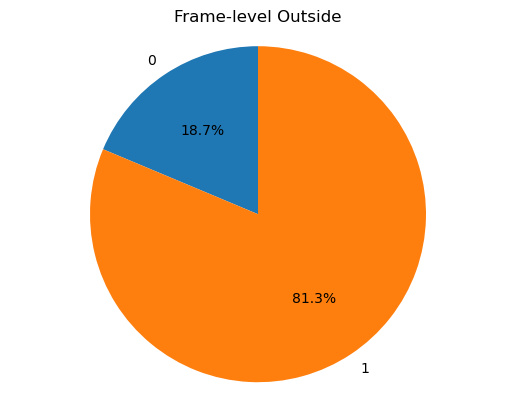

In [77]:
draw_pie_chart(test_outside_distribution_frame_level_dict, title="Frame-level Outside")

### Overall

In [78]:
frames_ratio_dict = {'train': train_frames, 'val': val_frames, 'test': test_frames}

In [79]:
sequences_ratio_dict = {'train': train_video_sequences, 'val': val_video_sequences, 'test': test_video_sequences}

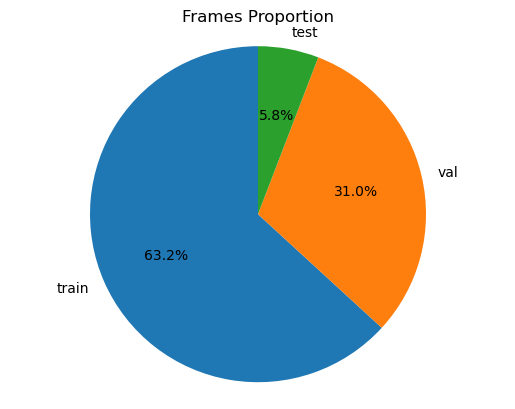

In [80]:
draw_pie_chart(frames_ratio_dict, 'Frames Proportion')

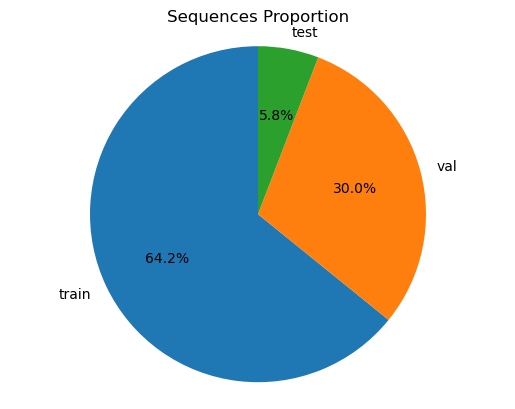

In [81]:
draw_pie_chart(sequences_ratio_dict, 'Sequences Proportion')